Завдання 1.
Загрузити датасет
Global YouTube Statistics 2023 з K aggle
Виконайте наступні завдання:
1.
Прочитайте CSV файл
2.
Виведіть перші п'ять рядків
3.
Виведіть розміри датасету, перевірте наявність пропусків, дублікатів.
4.
Якщо є пропуски, замінить тип даних на float і середнє значення за
стовпцем.
5.
Ще раз перевірте кількість пропусків.
6.
Перевірте, скільки унікальних країн представлено у колонці " Country"
7.
Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):
8.
Визначте максимальну, мінімальну, середню кількість переглядів
(використовуйте методи max, min, mean)
9.
Знайдіть країну, де найбільше відео було завантажено на YouTube
10.
Знайдіть відео (виведіть його назву) з найбільшою та найменшою
кількістю завантажень uploads.

Перші п'ять рядків:
   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0

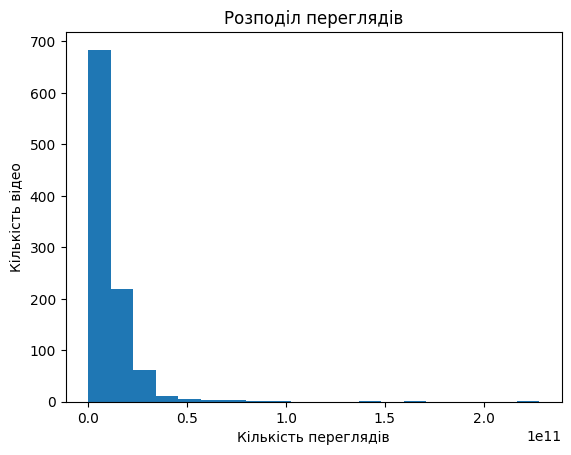


Максимальна кількість переглядів: 228000000000.0
Мінімальна кількість переглядів: 0.0
Середня кількість переглядів: 11039537052.03819

Країна, де найбільше відео завантажено на YouTube: United States

Відео з найбільшою кількістю завантажень: ABP NEWS
Відео з найменшою кількістю завантажень: Music


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Прочитайте CSV файл
file_path = "./GlobalYouTubeStatistics.csv"
df = pd.read_csv(file_path, encoding='latin1')

# 2. Виведіть перші п'ять рядків
print("Перші п'ять рядків:")
print(df.head())

# 3. Виведіть розміри датасету, перевірте наявність пропусків, дублікатів
print("\nРозміри датасету:")
print(df.shape)
print("\nПеревірка пропусків:")
print(df.isnull().sum())
print("\nПеревірка дублікатів:")
print(df.duplicated().sum())

# 4. Якщо є пропуски, замінить тип даних на float і середнє значення за стовпцем
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# 5. Ще раз перевірте кількість пропусків
print("\nПеревірка пропусків після заповнення:")
print(df.isnull().sum())

# 6. Перевірте, скільки унікальних країн представлено у колонці "Country"
unique_countries = df['Country'].nunique()
print(f"\nКількість унікальних країн: {unique_countries}")

# 7. Побудуйте діаграму розподілу переглядів
df['video views'] = df['video views'].astype(float)
df['video views'].plot(kind='hist', bins=20, title='Розподіл переглядів')
plt.xlabel('Кількість переглядів')
plt.ylabel('Кількість відео')
plt.show()

# 8. Визначте максимальну, мінімальну, середню кількість переглядів
max_views = df['video views'].max()
min_views = df['video views'].min()
mean_views = df['video views'].mean()
print(f"\nМаксимальна кількість переглядів: {max_views}")
print(f"Мінімальна кількість переглядів: {min_views}")
print(f"Середня кількість переглядів: {mean_views}")

# 9. Знайдіть країну, де найбільше відео було завантажено на YouTube
most_videos_country = df['Country'].value_counts().idxmax()
print(f"\nКраїна, де найбільше відео завантажено на YouTube: {most_videos_country}")

# 10. Знайдіть відео з найбільшою та найменшою кількістю завантажень
max_uploads_video = df.loc[df['uploads'].idxmax()]['Title']
min_uploads_video = df.loc[df['uploads'].idxmin()]['Title']
print(f"\nВідео з найбільшою кількістю завантажень: {max_uploads_video}")
print(f"Відео з найменшою кількістю завантажень: {min_uploads_video}")
